# Análise de dados da COVID-19 no Brasil
Essa análise filtra os dados por estados.
 > Esse notebook foi criado apenas para por em prática o que venho estudando sobre Data Science.
 
 As fontes de dados usadas aqui vem de [covid.saude.gov.br](https://covid.saude.gov.br/)

In [0]:
import pandas as pd
from pandas.testing import assert_frame_equal
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

plt.style.use('seaborn-whitegrid')

In [0]:
# data repository
brasil = pd.read_csv("https://raw.githubusercontent.com/infoslack/covid-19/master/data/brazil_covid19.csv")
brasil['date'] = pd.to_datetime(brasil['date'])

# Número de casos por estado

In [18]:
group_uf = brasil.groupby('state')
uf = group_uf.tail(1).sort_values('cases', ascending=False).drop(columns=['date']).set_index('state')
uf.style.background_gradient(cmap='Oranges', subset=['cases','deaths'])

,region,cases,deaths
state,,,
São Paulo,Sudeste,6708,428
Rio de Janeiro,Sudeste,1938,106
Ceará,Nordeste,1291,43
Amazonas,Norte,804,30
Minas Gerais,Sudeste,614,14
Rio Grande do Sul,Sul,555,9
Paraná,Sul,539,17
Distrito Federal,Centro-Oeste,509,12
Bahia,Nordeste,497,15


# Gráfico comparativo de casos por estado
Amostragem dos 5 estados com maior número de casos

No handles with labels found to put in legend.


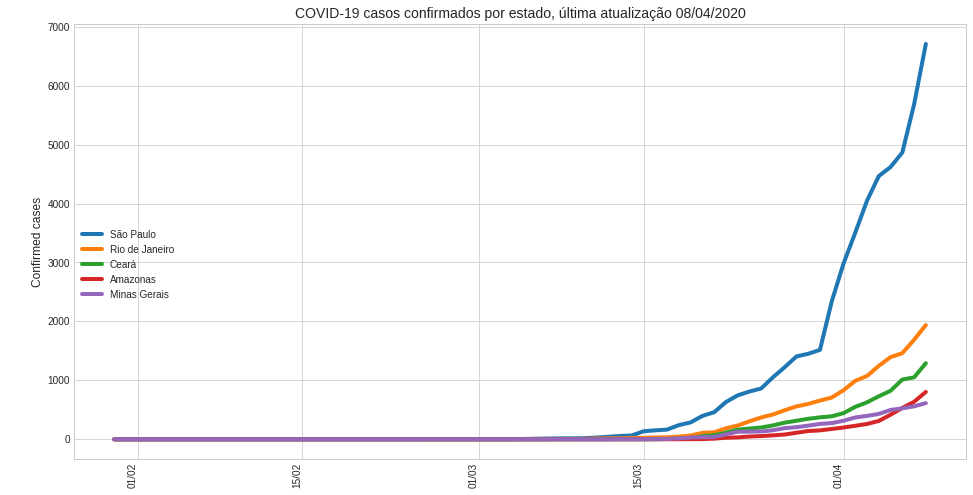

In [24]:
fig, ax = plt.subplots(figsize=(16, 8))

labels = []
for s in uf.index[:5]:
    l = sns.lineplot(x='date', y='cases', data=brasil[(brasil['state'] == s)], linewidth=4)
    labels.append(s)
    
plt.ylabel('Confirmed cases', fontsize=12)
plt.xlabel(None)
plt.xticks(rotation=90, ha='right')
plt.title('COVID-19 casos confirmados por estado, última atualização {}'.format(brasil.iloc[-1,0].strftime('%d/%m/%Y')), fontsize=14)
fig.legend(loc=6, bbox_to_anchor=(0.063, 0.4), labels=labels)
plt.legend(loc=2, fancybox=True, fontsize=10)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m'))

# Total de casos contabilizados no Brasil

In [19]:
d = {'cases' : uf['cases'].sum(), 'deaths': uf['deaths'].sum()}
total = pd.DataFrame(d.items(), columns=['type', 'total_count']).set_index('type')
total

,total_count
type,
cases,15927
deaths,800
